<a href="https://colab.research.google.com/github/CheimaAissa/CodeClause_Gold_Price_Prediction/blob/main/GoldPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gold price prediction**

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

## Data collection and processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gold_price_data.csv')

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# basic information about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## Correlation

In [9]:
correlation = gold_data.corr()

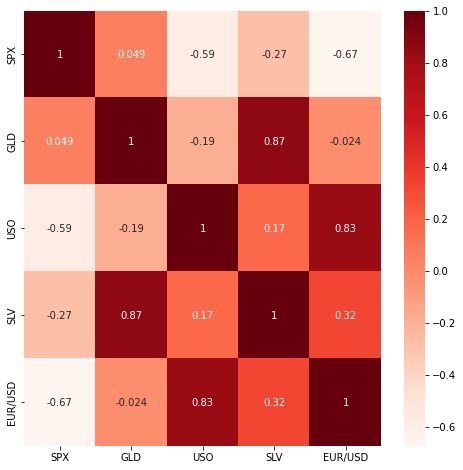

In [10]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, annot=True, cmap='Reds')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


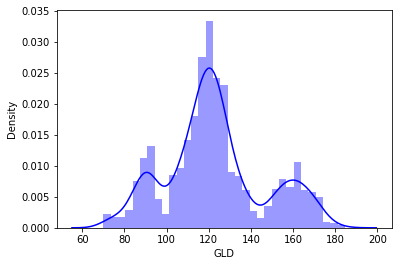

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='blue')

## Splitting the Features and Target

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [39]:
regressor = RandomForestRegressor(n_estimators=100)

In [40]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model Evaluation

In [41]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [42]:
print(test_data_prediction)

[168.5533994   82.1004996  115.80379996 127.60920078 120.72140121
 154.87879757 150.04069777 126.19729977 117.57799884 125.92730074
 116.598001   171.6976007  141.59539908 167.89079852 115.23899988
 117.51470074 140.21800341 170.27630085 159.55450309 160.23420003
 155.12970038 125.03060014 175.90930001 157.84520222 125.13710035
  93.77239959  78.08050034 120.65079971 119.10359963 167.412699
  88.19940086 124.91499975  91.06960065 117.79240029 121.15689941
 136.06460013 115.47270084 115.41370075 146.66249951 107.4922011
 104.58260266  87.30699783 126.37810027 117.72079983 153.1576988
 119.6277001  108.42529932 108.04559817  93.15790076 127.19369751
  74.35560072 113.58589948 121.34180016 111.31719946 118.982499
 120.44259953 159.27309977 169.60540086 146.99109646  85.74109851
  94.57390021  86.87229883  90.43119992 119.07170064 126.44580069
 127.58350066 168.98180028 122.29249932 117.241999    98.37270036
 167.71360229 143.16069845 131.77390272 121.05630227 120.89599944
 119.51510083 11

In [43]:
# R squared error
r_square = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", r_square)

R squared error :  0.9892920009673323


In [44]:
Y_test = list(Y_test)

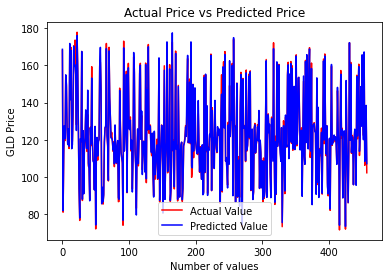

In [45]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()